# SIMPLE_LINEAR_REGRESSION

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
a=pd.read_csv('boston_housing.csv')
a

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [24]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# 1..Consider the column, ‘RM’, as predictor, and ‘MEDV’ as the target variable

In [46]:
x=a.iloc[:,5:]
x

,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [47]:
y=a.iloc[:,13:]
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


# 2..Visualize the association between the predictor and the target using scatter plot.

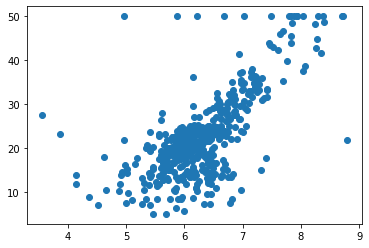

In [48]:
plt.scatter('RM','MEDV',data=a)

# 3.. Split the data into train and test datasets, in the ratio of 67:33.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [51]:
x_train

,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
81,6.619,70.4,5.4007,4,281,19.0,395.63,7.22,23.9
360,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0
394,5.887,94.7,1.7821,24,666,20.2,396.90,16.35,12.7
194,6.604,18.8,6.2196,1,265,15.6,376.70,4.38,29.1
477,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
...,...,...,...,...,...,...,...,...,...
323,5.708,74.3,4.7211,5,287,19.6,391.13,11.74,18.5
192,7.178,26.3,6.4798,5,398,15.2,390.49,2.87,36.4
117,6.021,82.6,2.7474,6,432,17.8,394.51,10.30,19.2
47,6.030,85.5,5.6894,3,233,17.9,392.74,18.80,16.6


In [52]:
x_test

,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
329,6.333,17.2,5.2146,4,430,16.9,375.21,7.34,22.6
371,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
219,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
403,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3
78,6.232,53.7,5.0141,5,398,18.7,386.40,12.34,21.2
...,...,...,...,...,...,...,...,...,...
281,6.968,37.2,5.2447,5,216,14.9,392.23,4.59,35.4
231,7.412,76.9,3.6715,8,307,17.4,376.14,5.25,31.7
64,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
327,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2


In [53]:
y_train

,MEDV
81,23.9
360,25.0
394,12.7
194,29.1
477,12.0
...,...
323,18.5
192,36.4
117,19.2
47,16.6


In [54]:
y_test

,MEDV
329,22.6
371,50.0
219,23.0
403,8.3
78,21.2
...,...
281,35.4
231,31.7
64,33.0
327,22.2


# 4.. Build a Linear Regression model using training dataset, to predict the target variable.

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
new=LinearRegression()

In [57]:
new.fit(x_train,y_train)

LinearRegression()

In [60]:
pred=new.predict(x_test)
pred

array([[22.6],
       [50. ],
       [23. ],
       [ 8.3],
       [21.2],
       [19.9],
       [20.6],
       [18.7],
       [16.1],
       [18.6],
       [ 8.8],
       [17.2],
       [14.9],
       [10.5],
       [50. ],
       [29. ],
       [23. ],
       [33.3],
       [29.4],
       [21. ],
       [23.8],
       [19.1],
       [20.4],
       [29.1],
       [19.3],
       [23.1],
       [19.6],
       [19.4],
       [38.7],
       [18.7],
       [14.6],
       [20. ],
       [20.5],
       [20.1],
       [23.6],
       [16.8],
       [ 5.6],
       [50. ],
       [14.5],
       [13.3],
       [23.9],
       [20. ],
       [19.8],
       [13.8],
       [16.5],
       [21.6],
       [20.3],
       [17. ],
       [11.8],
       [27.5],
       [15.6],
       [23.1],
       [24.3],
       [42.8],
       [15.6],
       [21.7],
       [17.1],
       [17.2],
       [15. ],
       [21.7],
       [18.6],
       [21. ],
       [33.1],
       [31.5],
       [20.1],
       [29.8],
       [15

In [61]:
y_test

,MEDV
329,22.6
371,50.0
219,23.0
403,8.3
78,21.2
...,...
281,35.4
231,31.7
64,33.0
327,22.2


# 5.. Observe the coefficient and intercept values for the model

In [62]:
new.intercept_

array([3.55271368e-15])

In [63]:
new.coef_

array([[-4.19502782e-15,  3.95512577e-17, -2.79847839e-16,
         1.20224772e-15,  6.72156632e-19,  1.59310028e-16,
         1.84241340e-17, -7.87324952e-16,  1.00000000e+00]])

# 6.. Evaluate the model using mean squared error values and R-squared values on the training and the testing datasets.

In [64]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [65]:
r2_score(y_test,pred)

1.0

In [68]:
ab=mean_squared_error(y_test,pred)
ab

9.174405090540414e-29

In [69]:
ab=mean_absolute_error(y_test,pred)
ab

7.105427357601002e-15

In [70]:
np.sqrt(ab)

8.429369702178807e-08

In [71]:
new.score(x_train,y_train)

1.0

# MULTIPLE_LINEAR_REGRESSION

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("boston_housing.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# 1.. Consider the columns, ‘RM’, ‘DIS’, ‘TAX’, ‘INDUS’ as predictors, and ‘MEDV’ as the target variable

In [6]:
x=df.iloc[:,[5,7,9,2]]
x

,RM,DIS,TAX,INDUS
0,6.575,4.0900,296,2.31
1,6.421,4.9671,242,7.07
2,7.185,4.9671,242,7.07
3,6.998,6.0622,222,2.18
4,7.147,6.0622,222,2.18
...,...,...,...,...
501,6.593,2.4786,273,11.93
502,6.120,2.2875,273,11.93
503,6.976,2.1675,273,11.93
504,6.794,2.3889,273,11.93


In [7]:
y=df.iloc[:,[13]]
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


# 2.. Calculate the Variance Inflation Factor for each of the selected predictors. Based on the VIF factor, finalize the list of predictors.

# 3..  For every predictor identified, visualize its association with the target column using scatter plot.

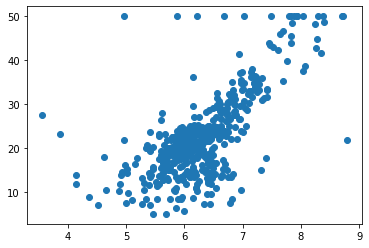

In [8]:
plt.scatter('RM','MEDV',data=df)

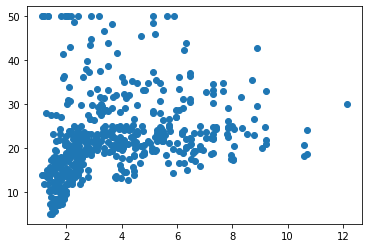

In [9]:
plt.scatter('DIS','MEDV',data=df)

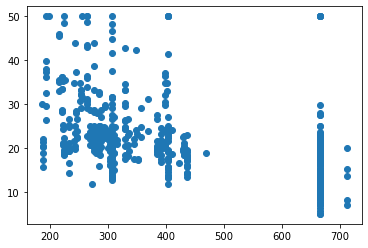

In [10]:
plt.scatter('TAX','MEDV',data=df)

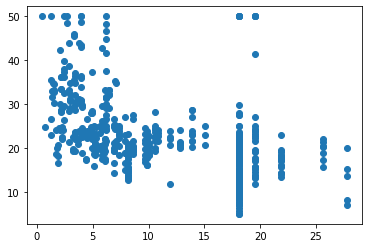

In [11]:
plt.scatter('INDUS','MEDV',data=df)

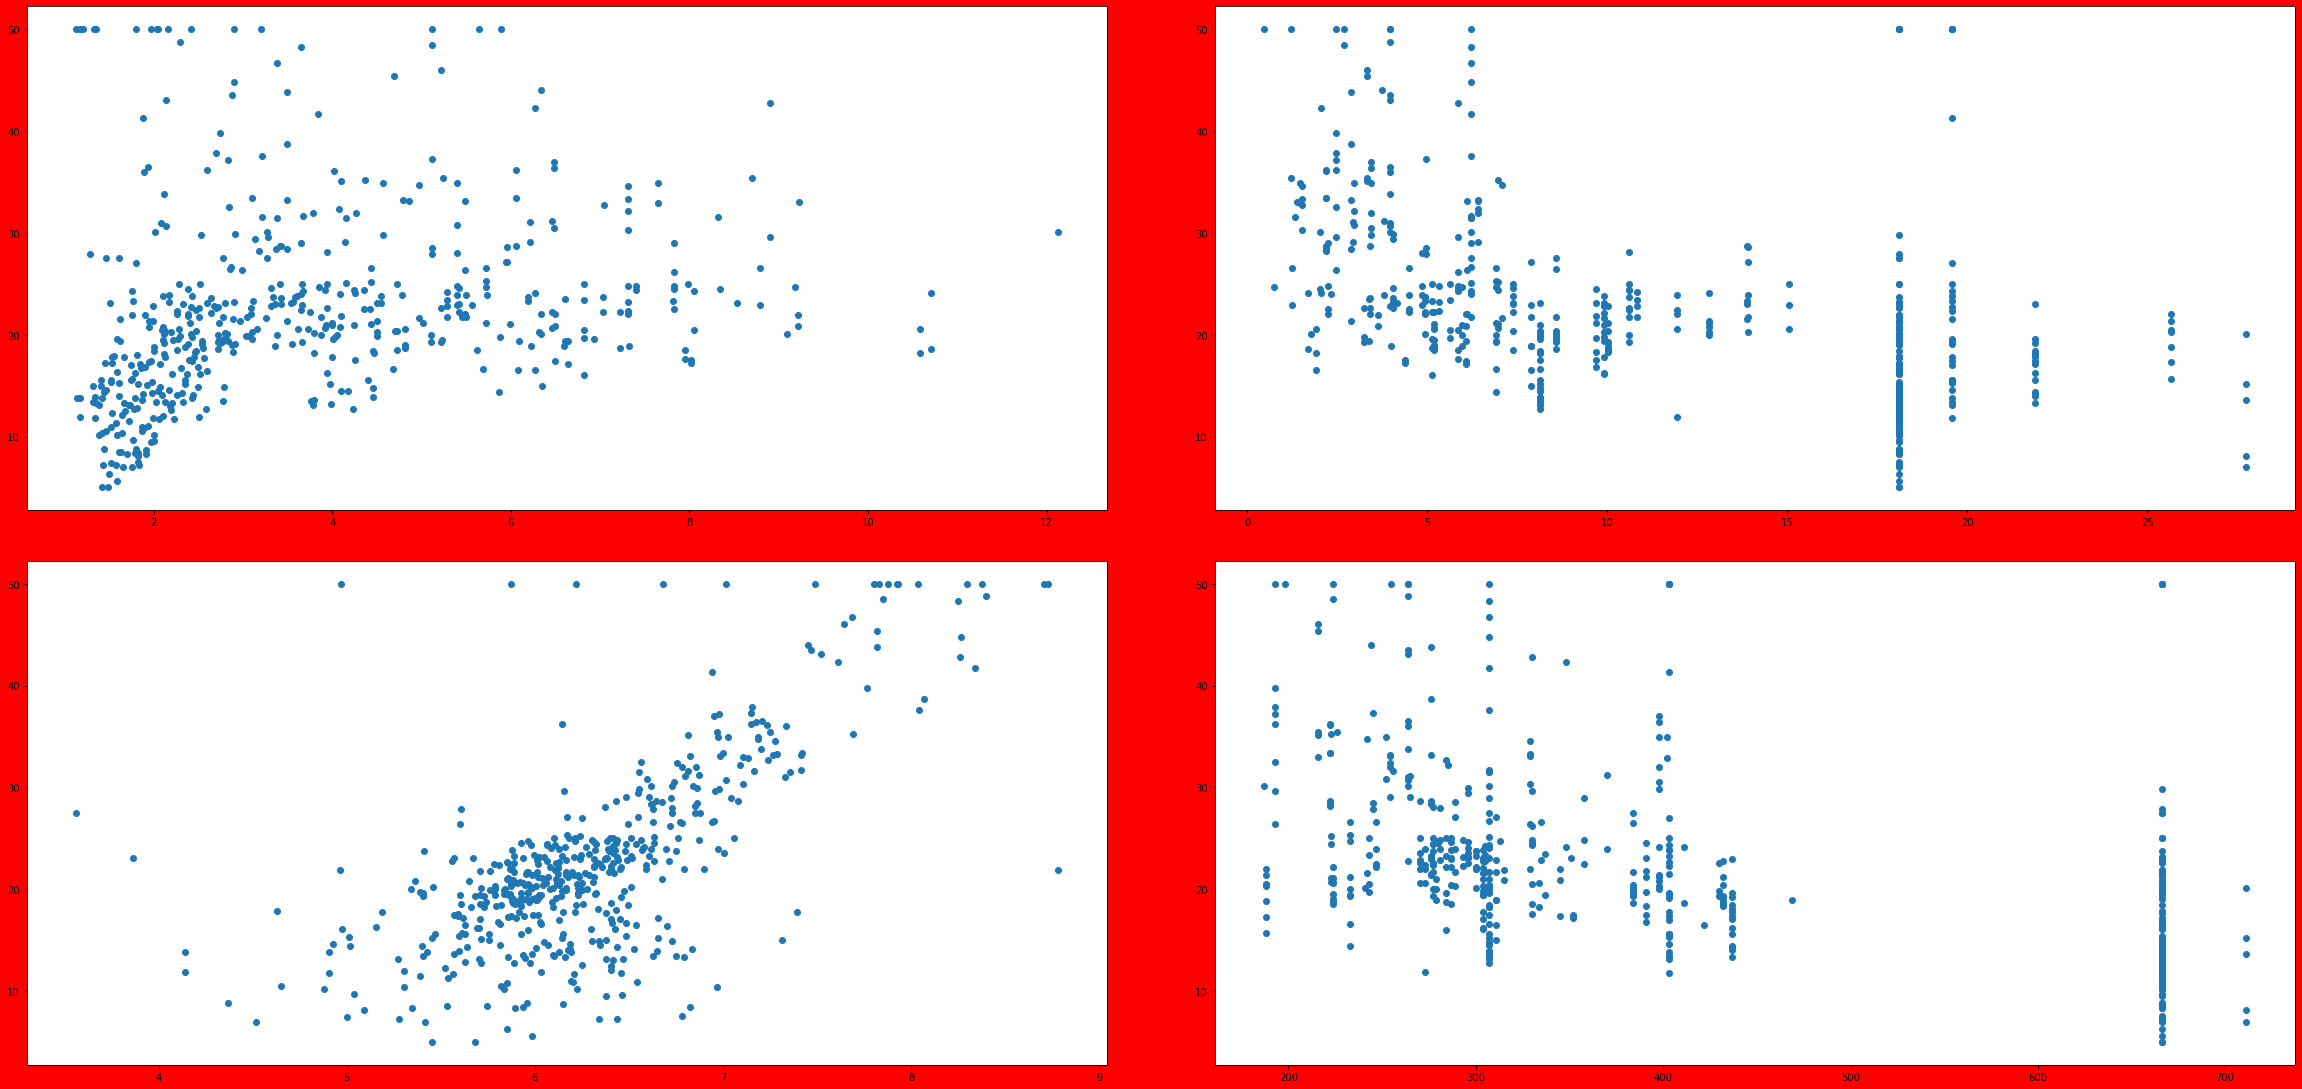

In [12]:
fig=plt.figure(figsize=(15,7),facecolor='r')
ax1=fig.add_axes([1,1,1,1])
ax1.scatter('RM','MEDV',data=df)
ax2=fig.add_axes([1,2.1,1,1])
ax2.scatter('DIS','MEDV',data=df)
ax3=fig.add_axes([2.1,1,1,1])
ax3.scatter('TAX','MEDV',data=df)
ax4=fig.add_axes([2.1,2.1,1,1])
ax4.scatter('INDUS','MEDV',data=df)

# 4.. Split the data into train and test datasets, in the ratio of 67:33.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=0)

In [15]:
xtrain

,RM,DIS,TAX,INDUS
81,6.619,5.4007,281,4.86
360,6.398,2.5182,666,18.10
394,5.887,1.7821,666,18.10
194,6.604,6.2196,265,2.93
477,5.304,2.1007,666,18.10
...,...,...,...,...
323,5.708,4.7211,287,7.38
192,7.178,6.4798,398,3.44
117,6.021,2.7474,432,10.01
47,6.030,5.6894,233,6.91


In [16]:
xtest

,RM,DIS,TAX,INDUS
329,6.333,5.2146,430,3.24
371,6.216,1.1691,666,18.10
219,6.373,3.3633,276,13.89
403,5.349,1.7028,666,18.10
78,6.232,5.0141,398,12.83
...,...,...,...,...
281,6.968,5.2447,216,3.33
231,7.412,3.6715,307,6.20
64,7.104,9.2229,216,1.38
327,6.083,5.4159,287,7.38


In [17]:
ytrain

,MEDV
81,23.9
360,25.0
394,12.7
194,29.1
477,12.0
...,...
323,18.5
192,36.4
117,19.2
47,16.6


In [18]:
ytest

,MEDV
329,22.6
371,50.0
219,23.0
403,8.3
78,21.2
...,...
281,35.4
231,31.7
64,33.0
327,22.2


# 5.. Build a Linear Regression model, to predict the target variable using the selected predictors.

In [19]:
from sklearn.linear_model import LinearRegression

In [21]:
new1=LinearRegression()

In [22]:
new1.fit(xtrain,ytrain)

LinearRegression()

In [24]:
pred=new1.predict(xtest)
pred

array([[23.56318741],
       [18.19983264],
       [24.70774245],
       [11.19003537],
       [21.30217173],
       [20.73012624],
       [14.79868875],
       [23.40723876],
       [14.68121582],
       [24.88427295],
       [15.8711894 ],
       [21.45367269],
       [18.72558391],
       [ 5.88361946],
       [33.49382524],
       [29.00203516],
       [17.28616281],
       [31.73250343],
       [27.96398227],
       [21.9877746 ],
       [25.75712728],
       [18.36750108],
       [23.01440182],
       [27.05957455],
       [20.54978366],
       [-0.27666846],
       [21.99002241],
       [17.41585302],
       [40.16015972],
       [21.5504992 ],
       [17.46308273],
       [16.38322183],
       [22.17780076],
       [22.62754204],
       [27.19302066],
       [14.62246772],
       [16.21040571],
       [15.56623072],
       [18.7895982 ],
       [17.26656375],
       [21.54591684],
       [21.35895519],
       [21.76655988],
       [11.43714953],
       [25.05045831],
       [26

In [25]:
ytest

,MEDV
329,22.6
371,50.0
219,23.0
403,8.3
78,21.2
...,...
281,35.4
231,31.7
64,33.0
327,22.2


# 6..  Observe the coefficients and intercept values for the model. 

In [27]:
new1.intercept_

array([-16.40033014])

In [28]:
new1.coef_

array([[ 7.78049546, -0.49486174, -0.0140603 , -0.21108811]])

# 7.. Evaluate the model using mean squared error values, R-squared values, and adjusted R-Squared values, on the train and the test data.

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [30]:
r2_score(ytest,pred)

0.5060056001257377

In [31]:
ar=mean_squared_error(ytest,pred)

In [32]:
ar

39.82688491379004

In [33]:
ar=mean_absolute_error(ytest,pred)
ar

4.033704170400567

In [35]:
np.sqrt(ar)

2.008408367439393